In [33]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer 
import numpy as np

In [19]:
jobls = []
for i in range(1,10):
    my_file = open('descs_soup2'+str(i)+'.txt', "r",encoding="utf-8")
    content = my_file.read()
    content_list = content.split("JD TERMINATED")
    jobls += content_list

In [20]:
len(jobls)

234

In [21]:
word_list = []
for i in jobls:
    word_list.append(nltk.word_tokenize(i))

In [6]:
df = pd.DataFrame(jobls)

In [22]:
print(word_list)
lemmatizer = WordNetLemmatizer()
jb1 = []
for i in word_list:
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in i])
    jb1.append(lemmatized_output)
print(jb1)

[['Share', 'Show', 'more', 'options', 'Data', 'Analyst', 'Modo', 'Energy', 'England', ',', 'United', 'Kingdom', 'Hybrid', '2', 'weeks', 'ago', '48', 'applicants', 'Full-time', '11-50', 'employees', 'Robyn', 'Lucas', 'is', 'hiring', 'for', 'this', 'job', 'Your', 'skills', 'are', 'a', 'strong', 'match', 'for', 'this', 'jobYour', 'skills', 'are', 'a', 'strong', 'match', 'for', 'this', 'job', 'Easy', 'Apply', 'Save', 'Save', 'Data', 'Analyst', 'at', 'Modo', 'Energy', 'Data', 'Analyst', 'Modo', 'Energy', 'England', ',', 'United', 'Kingdom', 'Hybrid', 'Easy', 'Apply', 'Save', 'Save', 'Data', 'Analyst', 'at', 'Modo', 'Energy', 'Show', 'more', 'options', 'Posted', 'by', 'Robyn', 'Lucas', '2nd', 'Chief', 'Analytics', 'Officer', 'at', 'Modo', 'Send', 'InMail', 'Check', 'out', 'our', 'careers', 'page', 'https', ':', '//modoenergy.recruitee.com/', 'Pay', 'range', 'unavailable', 'Salary', 'information', 'is', 'not', 'available', 'at', 'the', 'moment', '.', 'Are', 'you', 'interested', 'in', 'salary'

In [59]:
stopwords = set(STOPWORDS)
# selecting useless words
badwords = {'application', 'Apply', 'salary', 'company', 'identity', 'sexual', 'orientation', 'free', 'Full',
            'England','United Kingdom', 'UK', 'InMail', 'United', 'Kingdom', 'looking','based','required'
            'send', 'match', 'London','role','develop','jobYour','skills', 'school alumni', 'posted','desirable',
            'requirement','opportunities','within','offer''good','required','posted', 'save', 'working', 'will', 
            'help', 'show', 'applicant', 'strong', 'option', 'mid', 'across', 'yr', 'work', 'benefit', 'level', 'one', 
            'skill', 'build', 'easy', 'easy','job', 'school', 'alumnus','Nigel Frank', 'week ago', 'new', 'including', 
            'provide', 'available','environment','send','high','using','meet','Frank','please','requirements','use',
            'able'}

# deleting the useless words on plot
stopwords.update(badwords)

In [60]:
wordcloud = WordCloud(width = 1200, height = 800, background_color='black',
                      stopwords=stopwords,
                      random_state=42).generate("".join(jb1))

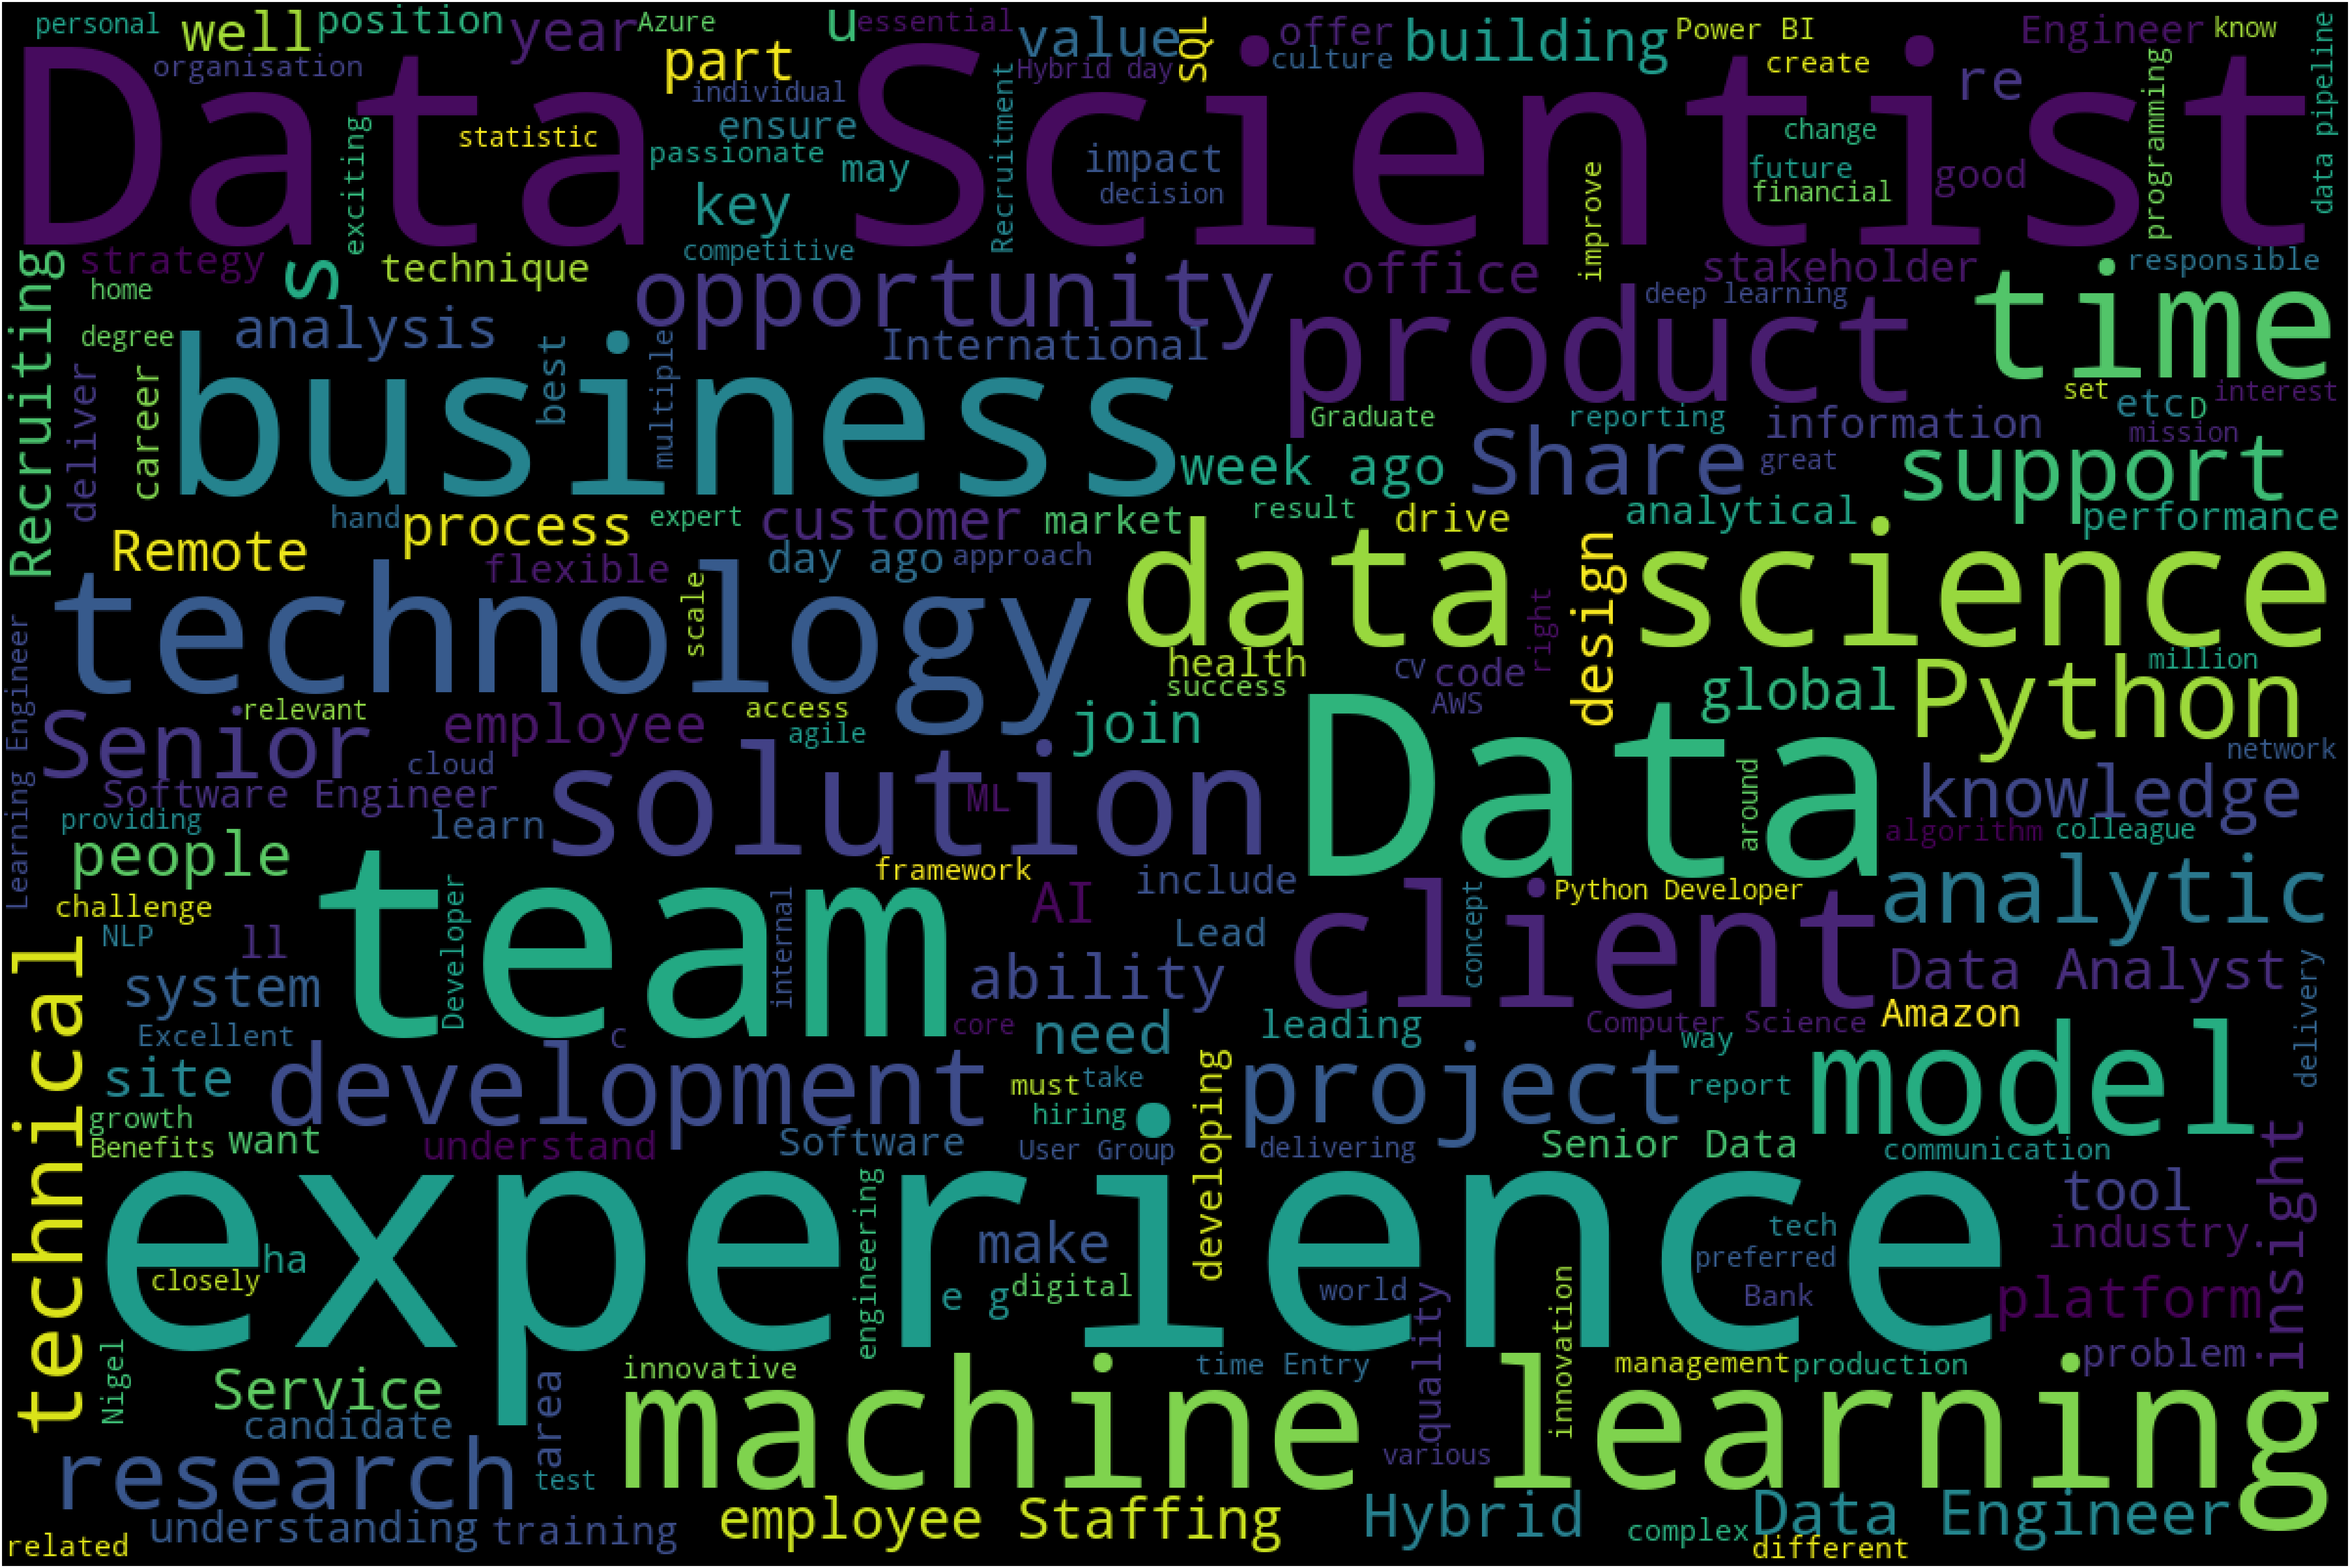

In [61]:
print(wordcloud)
plt.figure(figsize=(200, 100))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer(input='content', stop_words='english')
dtm = vectorizer.fit_transform(jb1).toarray()
vocab = np.array(vectorizer.get_feature_names())
dtm.shape, len(vocab)

C:\Users\srika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


((234, 6960), 6960)

In [36]:
vocab

array(['00', '000', '00015', ..., 'zigzag', 'zoho', 'zone'], dtype='<U60')

In [37]:
scores = {'Words': vocab,'Scores':sum(dtm)}
word_scores = pd.DataFrame(data = scores)
word_scores.sort_values(by = ['Scores'],inplace = True, ascending = False)

In [39]:
word_scores[0:50]

,Words,Scores
1731,data,30.883312
5569,scientist,13.782956
5522,save,12.335825
2287,engineer,10.235806
2486,experience,9.490709
5766,skill,8.594498
6256,team,8.228006
590,apply,8.120717
1950,developer,7.978279
3790,london,7.976541


In [68]:
freq_check = ['python','sql','junior','senior', 'graduate'
             'marketing', 'customer','market',
              'estate',
              'product','research','analytics',
             'statistics','modelling',
             'financial','fintech',
             'deep','neural',
              'machine', 'scientist','analyst'
             ]

In [69]:
word_scores[word_scores.Words.isin(freq_check)]

,Words,Scores
5569,scientist,13.782956
525,analyst,6.838330
3836,machine,6.205034
5638,senior,6.012114
5045,python,5.607081
531,analytics,5.050905
5325,research,4.288818
4901,product,3.919819
1691,customer,3.599854
5950,sql,3.399760
